# Библиотека Numpy

Numpy - это библиотека для работы с матрицами и тензорами. Основная функциональность библиотеки реализована на C/C++, из-за чего скорость всех операций весьма высока. По сути дела, при реализации вычислений с помощью Numpy язык Python является своего рода "клеем", который объединяет высокопроизводительные матричные операции, реализованные на эффективном языке.

Основной структурой данных numpy является массив `ndarray`:

In [1]:
import numpy as np

a = np.array([1,2,3,4,5])
a

array([1, 2, 3, 4, 5])

Основные отличия массива от списка:
* Массивы могут быть многомерными (5x5, 6x3x5 и т.д.), с произвольным числом размерностей
* Все элементы массива - одного типа. В отличие от базовых типов Python, типы элементов массивов отличаются: `np.int32`, `np.float64` и т.д. Тип элементов можно указать при создании с помощью параметра `dtype`.
* Над массивами удобно совершать параллельные арифметические операции, которые производятся поэлементно. Например: 

In [2]:
b = np.array([5,4,3,2,1],dtype=np.int32)
c = a*b # поэлементное умножение, не векторное произведение!
c

array([5, 8, 9, 8, 5])

Размерность массива может быть легко изменена методом `.reshape`. Это не приводит к изменению размещения элементов в памяти, только к корректировке метаданных - поэтому такая операция производится быстро. Указание -1 в какой-то из размерностей означает, что она будет вычеслена автоматически:

In [8]:
a = np.arange(25) # массив элементов от 0 до 24
print(a)
a = a.reshape(-1,5)
print(a)
print(f"Shape = {a.shape}")

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
Shape = (5, 5)


> Массивы размерности 2 также называют матрицами, а массивы произвольной размерности - тензорами.

### Приведение размерностей

В `numpy` мы можем совершать поэлементные операции с массивами различных разменостей, если они **согласуются**. Например, а массиву `a` размерностью 5x5 можно прибавить число 1 - в этом случае размерность единицы будет расширена до 5x5. Аналогично можно прибавить к массиву 5x5 строку длины 5: 

In [11]:
print(a+1)
print(a+np.array([9,8,7,6,5]))

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]]
[[ 9  9  9  9  9]
 [14 14 14 14 14]
 [19 19 19 19 19]
 [24 24 24 24 24]
 [29 29 29 29 29]]


### Срезы

К массивам можно применять такие же операции срезов, как и к спискам - только более гибко. Например:

In [12]:
print("Первая строка a = ",a[0])
print("Первый столбец a = ",a[:,0])
print("Серединка a = \n",a[1:-1,1:-1])

Первая строка a =  [0 1 2 3 4]
Первый столбец a =  [ 0  5 10 15 20]
Серединка a = 
 [[ 6  7  8]
 [11 12 13]
 [16 17 18]]


Обратите внимание, что можно выбирать сразу несколько строк матрицы с помощью индексации списком:

In [13]:
a[[0,2,4]]

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

### Матричные операции

В `numpy` удобно производить матричные вычисления. Для матричного произведения используется операция `np.matmul` или `@`, для транспонирования - `.Т`.

In [14]:
a = np.random.normal(size=(2,5))
b = np.random.normal(size=(5,3))
print(a@b)
print((a@b).T)

[[ 1.42164707 -0.65613135 -0.24234129]
 [ 1.14933244 -1.6992162  -0.99276708]]
[[ 1.42164707  1.14933244]
 [-0.65613135 -1.6992162 ]
 [-0.24234129 -0.99276708]]


Можно вычислять обратную матрицу с помощью `np.linalg.inv`. В целом подпакет `linalg` содержит множество полезных операций из линейной алгебры.

> По правилам линейной алгебры, обращать можно только квадратные матрицы с ненулевым детерминантом. Если детерминант нулевой - будет инициирована ошибка.

> По правилам приведения размерности, мы можем обращать любой тензор, две последние размерности которого совпадают. В этом случае обращение матрицы будет произведено для каждого квадратного подмассива по всем комбинациям первоначальных индексов.

### Пример: решение системы линейных уравнений

С помощью обращения матрицы легко реализовать решение системы линейных уравнений, например:

$$
\begin{cases}
x_1+x_2+x_3 = 2 \\
2x_1+3x_2-x_3 = 5\\
x_1-x_2+x_3 = 0\\
\end{cases}
$$

Такая система уравнений может быть представлена в матричной форме

$$
\begin{pmatrix} 1 & 1 & 1 \\ 2 & 3 & -1 \\ 1 & -1 & 1\end{pmatrix} \times
\begin{pmatrix} x_1 \\ x_2 \\ x_3 \end{pmatrix} =
\begin{pmatrix} 2 \\ 5 \\ 0 \end{pmatrix}
$$
или
$$
Ax = b
$$
Тогда, домножая на матрицу, обратную $A$, получаем
$$
x = A^{-1}b
$$
Это легко записать с помощью `numpy`:

In [15]:
A = np.array([[1,1,1],[2,3,-1],[1,-1,1]])
b = np.array([2,5,0])
x = np.linalg.inv(A)@b
x

array([ 1.00000000e+00,  1.00000000e+00, -2.22044605e-16])

Проверим:

In [16]:
A@np.array([1,1,0])

array([2, 5, 0])

### Типовые матрицы

Часто бывает необходимо задавать некоторые типовые матрицы заданного размера. Например, нулевые или единичные матрицы:

In [17]:
print("Нулевая матрица:\n",np.zeros(shape=(2,3)))
print("Единичная матрица:\n",np.eye(3))
print("Матрица из единиц, такой же размерности, как a:\n",np.ones_like(a))

Нулевая матрица:
 [[0. 0. 0.]
 [0. 0. 0.]]
Единичная матрица:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Матрица из единиц, такой же размерности, как a:
 [[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


В задачах машинного обучения часто бывает нужным закодировать номер с помощью так называемого **one-hot encoding**. Предположим, что у нас есть 5 разных классов, закодированных номерами от 0 до 4. One-hot encoding, соответствующий $i$-ому классу - это вектор размерности 5, у которого на $i$-ой позиции стоит единичка.

Для получения one-hot encoding удобно использовать индексирование единичной матрицы:

In [18]:
for i in range(5):
    print(f"Вектор, соответствующий {i} -> {np.eye(5)[i]}")

Вектор, соответствующий 0 -> [1. 0. 0. 0. 0.]
Вектор, соответствующий 1 -> [0. 1. 0. 0. 0.]
Вектор, соответствующий 2 -> [0. 0. 1. 0. 0.]
Вектор, соответствующий 3 -> [0. 0. 0. 1. 0.]
Вектор, соответствующий 4 -> [0. 0. 0. 0. 1.]


### Визуализация с помощью Matplotlib

Один из больших плюсов Python является наличие мощной библиотеки научной визуализации **matplotlib**. Например, если у нас есть некоторый набор данных, мы можем построить соответствующий график:

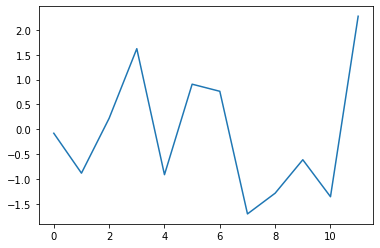

In [19]:
import matplotlib.pyplot as plt

a = np.random.normal(size=(12))
plt.plot(a)
plt.show()

Аналогичный график можно построить в виде bar-диаграммы - в этом случае надо передать набор координат по аси абсцисс и по оси ординат:

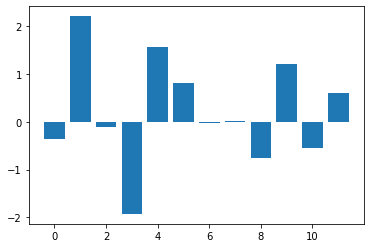

In [20]:
import matplotlib.pyplot as plt

a = np.random.normal(size=(12))
x = np.arange(len(a))
plt.bar(x,a)
plt.show()

Предположим, эти данные относятся к помесячным измерениям, т.е. по оси абсцисс надо отложить названия месяцев. Кроме того, повернём их для красоты на некоторый угол (задав параметр `rotation`), а также раскрасим все значения меньше нуля в красный цвет (для этого придётся пройтись циклом по всем значениям и установить цвет, если значение меньше 0).

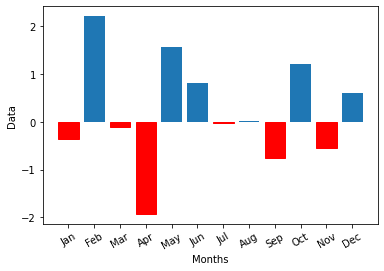

In [21]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
bars = plt.bar(x,a)
plt.xticks(x,months,rotation=30)
for b,v in zip(bars,a):
    if v<0:
        b.set_color('red')
plt.xlabel("Months")
plt.ylabel("Data")
plt.show()

**Matplotlib** поддерживает также создание нескольких графиков - **subplots**. В этом случае каждый из графиков называется **Axes** - это объект, которые содержит в себе дочерние графические элементы.

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(15,3))
# левый график
ax[0].plot(a)
ax[0].yaxis.grid() # добавить горизонтальные линии
# правый график
ax[1].bar(x,a)
# для каждого графика
for i in [0,1]:
    ax[i].set_xticks(x,months,rotation=30)
plt.show()